In [25]:
import os
# Merge text files

text_folder = r"D:\DataMining\ACTER-master\en\wind\annotated\texts"
output_file = r"D:\DataMining\ACTER-master\en\wind\merged_texts.txt"

with open(output_file, "w", encoding="utf-8") as outfile:
    for filename in os.listdir(text_folder):
        file_path = os.path.join(text_folder, filename)
        if os.path.isfile(file_path):
            with open(file_path, "r", encoding="utf-8") as infile:
                outfile.write(infile.read() + "\n") 

print("Файлы объединены в:", output_file)


Файлы объединены в: D:\DataMining\ACTER-master\en\wind\merged_texts.txt


In [26]:
# Load terms data

import pandas as pd

terms_file = r"D:\DataMining\ACTER-master\en\wind\annotated\annotations\unique_annotation_lists\wind_en_terms.tsv"

df_terms = pd.read_csv(terms_file, sep="\t", header=None, names=["term", "label"])

df_terms = df_terms[df_terms["label"].isin(["Specific_Term", "Common_Term"])]

print(df_terms.head())


                  term          label
0        active rotors  Specific_Term
1           active yaw  Specific_Term
2     active yaw drive  Specific_Term
3        actuator disk  Specific_Term
4  actuator disk model  Specific_Term


In [27]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

import re
import spacy
from nltk.corpus import stopwords
# Load spaCy model

nlp = spacy.load("en_core_web_sm")
# Define stop words

stop_words = set(stopwords.words("english"))

# Function for text cleaning and lemmatization
def preprocess_text(text):
    text = text.lower()  
    text = re.sub(r"[^a-z.\s]", "", text)  
    text = " ".join([word for word in text.split() if word not in stop_words])  
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])  
with open(output_file, "r", encoding="utf-8") as infile:
    text_data = infile.read()

clean_text = preprocess_text(text_data)

clean_output_file = r"D:\DataMining\ACTER-master\en\wind\clean_texts.txt"
with open(clean_output_file, "w", encoding="utf-8") as outfile:
    outfile.write(clean_text)

print("Текст очищен и сохранён в:", clean_output_file)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Текст очищен и сохранён в: D:\DataMining\ACTER-master\en\wind\clean_texts.txt


In [28]:
# --- Feature Extraction ---
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform([clean_text])

features = vectorizer.get_feature_names_out()
print("Пример признаков:", features[:10])


Пример признаков: ['aa' 'aagb' 'ab' 'abandon' 'abbott' 'abc' 'ability' 'able' 'above'
 'abruptly']


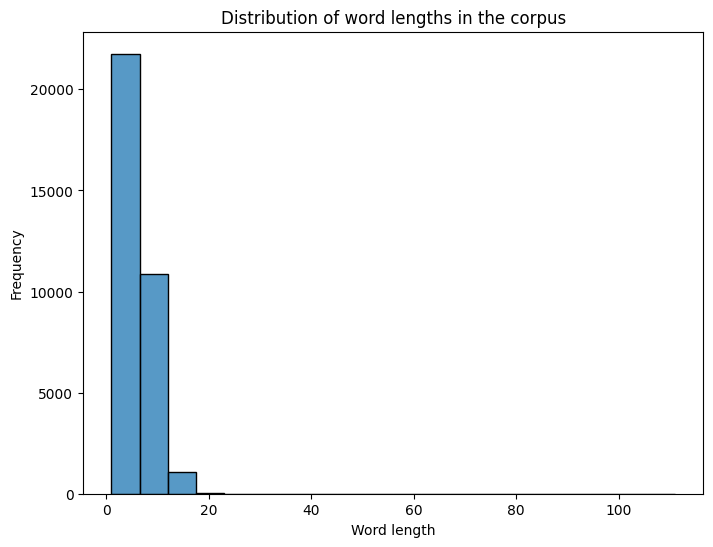

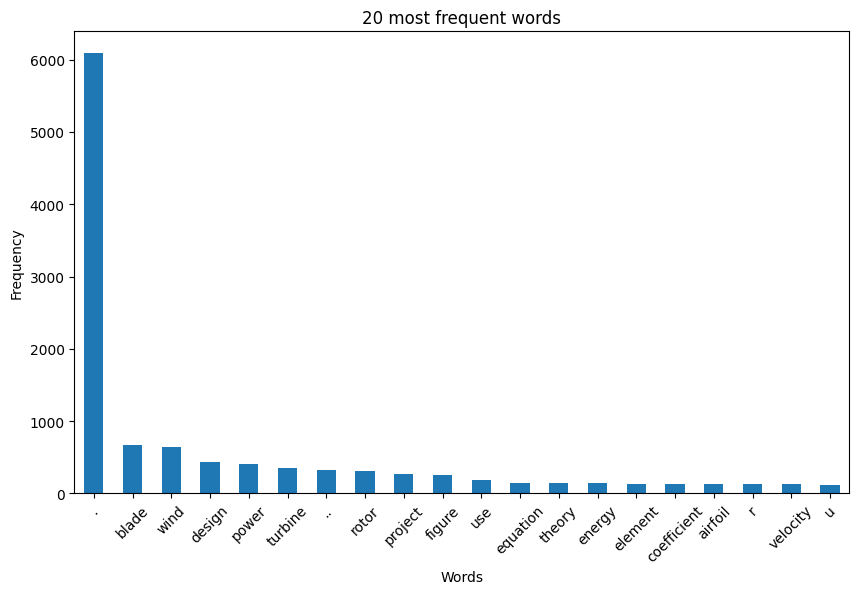

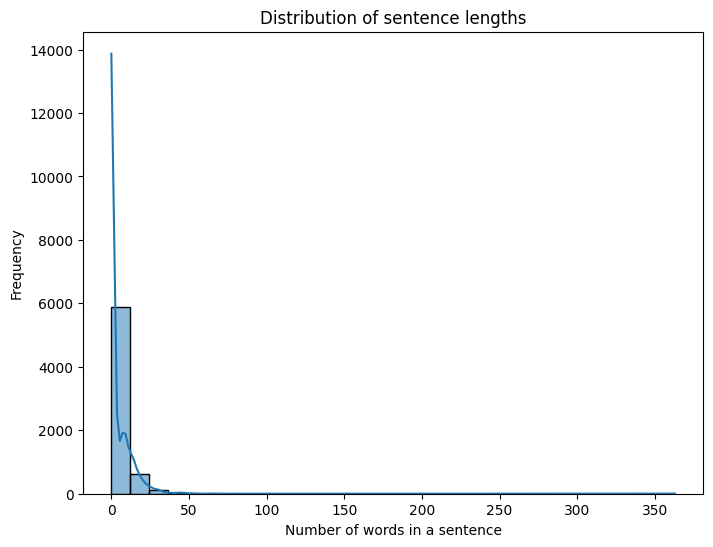

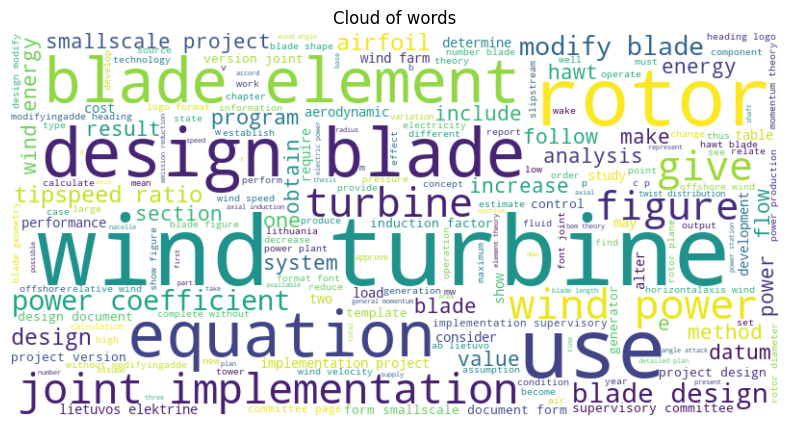

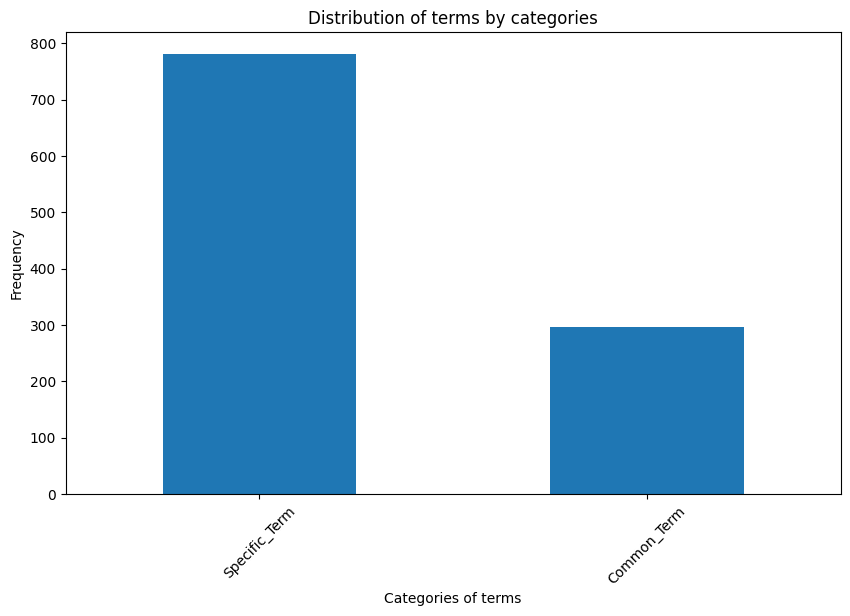

In [29]:
# --- Visualization ---
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
# Word length distribution
plt.figure(figsize=(8, 6))
sns.histplot([len(word) for word in clean_text.split()], bins=20)
plt.xlabel("Word length")
plt.ylabel("Frequency")
plt.title("Distribution of word lengths in the corpus")
plt.show()

# Top 20 most frequent words
top_words = pd.Series(clean_text.split()).value_counts().head(20)
plt.figure(figsize=(10, 6))
top_words.plot(kind='bar')
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("20 most frequent words")
plt.xticks(rotation=45)
plt.show()

# Sentence length distribution
sentence_lengths = [len(sentence.split()) for sentence in clean_text.split(". ")]
plt.figure(figsize=(8, 6))
sns.histplot(sentence_lengths, bins=30, kde=True)
plt.xlabel("Number of words in a sentence")
plt.ylabel("Frequency")
plt.title("Distribution of sentence lengths")
plt.show()

# Word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(clean_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Cloud of words")
plt.show()

# Term category distribution
plt.figure(figsize=(10, 6))
df_terms["label"].value_counts().plot(kind='bar')
plt.xlabel("Categories of terms")
plt.ylabel("Frequency")
plt.title("Distribution of terms by categories")
plt.xticks(rotation=45)
plt.show()

Word length statistics:
count    33773.000000
mean         5.417789
std          3.773018
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max        111.000000
dtype: float64

Sentence length statistics:
count    6673.000000
mean        4.148809
std         8.716003
min         0.000000
25%         0.000000
50%         0.000000
75%         7.000000
max       363.000000
dtype: float64


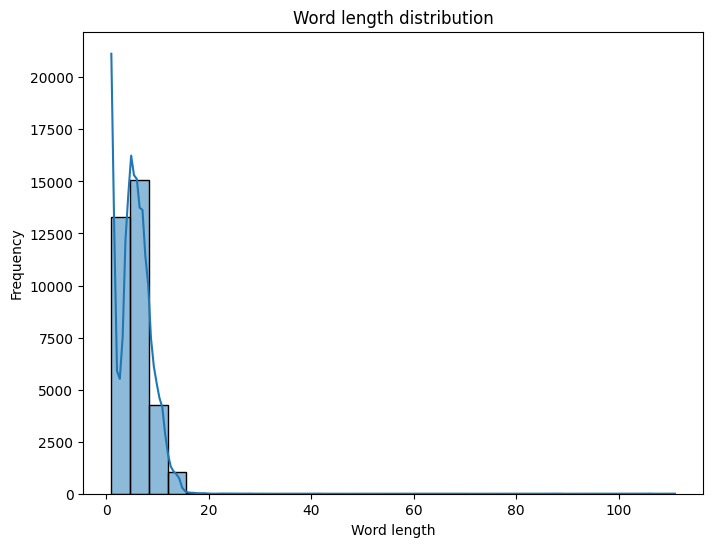

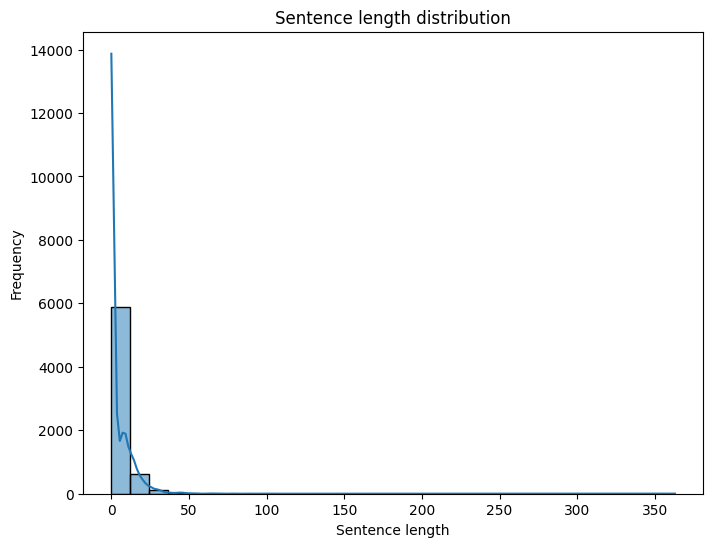

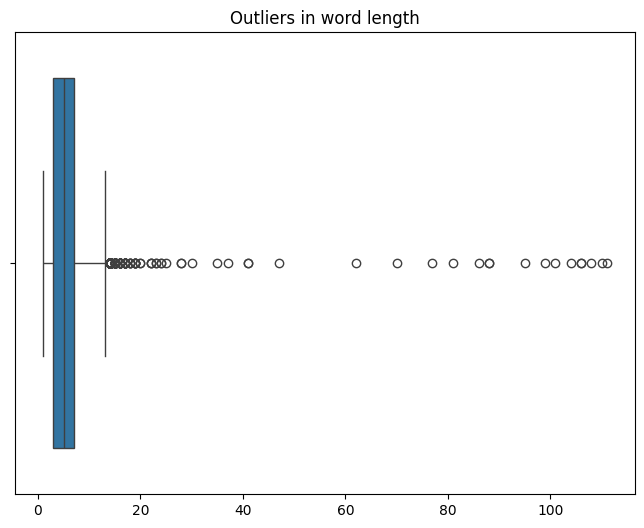

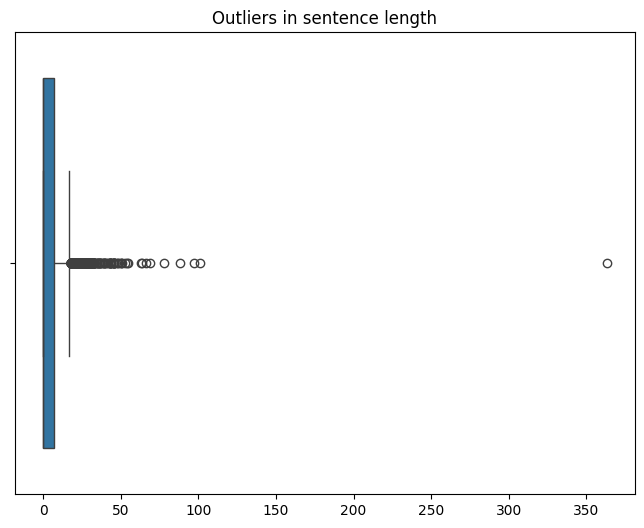


Initial insights on data quality:
Number of unique words: 3728
Total number of words: 33773
Average word length: 5.42
Average sentence length: 4.15


In [30]:
# Descriptive statistics
# Get statistics for word and sentence lengths
word_lengths = [len(word) for word in clean_text.split()]
sentence_lengths = [len(sentence.split()) for sentence in clean_text.split(". ")]

word_lengths_series = pd.Series(word_lengths)
sentence_lengths_series = pd.Series(sentence_lengths)

print("Word length statistics:")
print(word_lengths_series.describe())

print("\nSentence length statistics:")
print(sentence_lengths_series.describe())

# Word length distribution
plt.figure(figsize=(8, 6))
sns.histplot(word_lengths, bins=30, kde=True)
plt.xlabel("Word length")
plt.ylabel("Frequency")
plt.title("Word length distribution")
plt.show()

# Sentence length distribution
plt.figure(figsize=(8, 6))
sns.histplot(sentence_lengths, bins=30, kde=True)
plt.xlabel("Sentence length")
plt.ylabel("Frequency")
plt.title("Sentence length distribution")
plt.show()

# Outlier analysis
plt.figure(figsize=(8, 6))
sns.boxplot(x=word_lengths)
plt.title("Outliers in word length")
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=sentence_lengths)
plt.title("Outliers in sentence length")
plt.show()

# Initial insights on data quality
print("\nInitial insights on data quality:")
print(f"Number of unique words: {len(set(clean_text.split()))}")
print(f"Total number of words: {len(clean_text.split())}")
print(f"Average word length: {word_lengths_series.mean():.2f}")
print(f"Average sentence length: {sentence_lengths_series.mean():.2f}")
